In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
df = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [2]:
import tensorflow as tf

#Probar si tensorflow esta corriendo en una GPU
if tf.test.gpu_device_name():
  print(f'Se encontro el siguiente GPU: {tf.test.gpu_device_name()}')
else:
  print("Dewey esta no es tu familia")

Dewey esta no es tu familia


In [3]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [4]:
df.head(3)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong


<Axes: xlabel='Rating'>

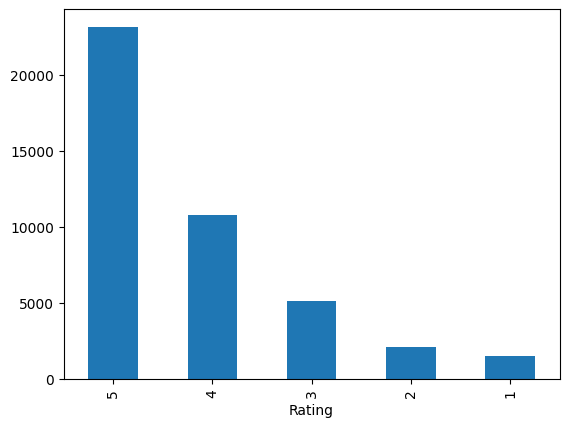

In [5]:
df['Rating'].value_counts().plot(kind="bar")

In [6]:
positivas = [4, 5]
neutras = [3]
negativas = [2,1]

df_pos = df[df['Rating']. isin(positivas)]
df_neu = df[df['Rating']. isin(neutras)]
df_neg = df[df['Rating']. isin(negativas)]

In [7]:
data_pos = ' '.join(df_pos['Review_Text']).splitlines(keepends = True)
data_neu = ' '.join(df_neu['Review_Text']).splitlines(keepends = True)
data_neg = ' '.join(df_neg['Review_Text']).splitlines(keepends = True)

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [9]:
tokenizer_pos = Tokenizer()
tokenizer_neu = Tokenizer()
tokenizer_neg = Tokenizer()
tokenizer_pos.fit_on_texts(data_pos)
tokenizer_neu.fit_on_texts(data_neu)
tokenizer_neg.fit_on_texts(data_neg)

In [10]:
tokenizer_pos.word_counts

OrderedDict([('if', 17156),
             ("you've", 383),
             ('ever', 1840),
             ('been', 7455),
             ('to', 117426),
             ('disneyland', 26138),
             ('anywhere', 505),
             ("you'll", 927),
             ('find', 2454),
             ('hong', 2666),
             ('kong', 2630),
             ('very', 14432),
             ('similar', 517),
             ('in', 58176),
             ('the', 231608),
             ('layout', 150),
             ('when', 9641),
             ('you', 51267),
             ('walk', 2637),
             ('into', 3467),
             ('main', 3556),
             ('street', 2452),
             ('it', 56319),
             ('has', 5129),
             ('a', 94980),
             ('familiar', 158),
             ('feel', 2320),
             ('one', 14109),
             ('of', 64541),
             ('rides', 26015),
             ('its', 4594),
             ('small', 4952),
             ('world', 6351),
             ('is', 53873

In [11]:
tokenizer_pos.word_index
tokenizer_neu.word_index
tokenizer_neg.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'we': 6,
 'in': 7,
 'for': 8,
 'was': 9,
 'i': 10,
 'it': 11,
 'is': 12,
 'were': 13,
 'that': 14,
 'you': 15,
 'not': 16,
 'on': 17,
 'park': 18,
 'at': 19,
 'disney': 20,
 'this': 21,
 'with': 22,
 'but': 23,
 'have': 24,
 'they': 25,
 'are': 26,
 'rides': 27,
 'there': 28,
 'be': 29,
 'as': 30,
 'so': 31,
 'my': 32,
 'had': 33,
 'disneyland': 34,
 'all': 35,
 'get': 36,
 'day': 37,
 'time': 38,
 'our': 39,
 'no': 40,
 'one': 41,
 'go': 42,
 'very': 43,
 'if': 44,
 'or': 45,
 'ride': 46,
 'people': 47,
 'just': 48,
 'would': 49,
 'only': 50,
 'from': 51,
 'an': 52,
 'when': 53,
 'food': 54,
 'out': 55,
 'which': 56,
 'your': 57,
 'been': 58,
 'up': 59,
 'us': 60,
 'staff': 61,
 'more': 62,
 'even': 63,
 'over': 64,
 'like': 65,
 '2': 66,
 'about': 67,
 'by': 68,
 'what': 69,
 'will': 70,
 'wait': 71,
 'place': 72,
 'paris': 73,
 'kids': 74,
 'do': 75,
 'then': 76,
 'back': 77,
 'many': 78,
 'went': 79,
 'long': 80,
 'line': 81,
 'ca

In [12]:
encoded_textP = tokenizer_pos.texts_to_sequences(data_pos)
encoded_textNeu = tokenizer_neu.texts_to_sequences(data_neu)
encoded_textNeg = tokenizer_neg.texts_to_sequences(data_neg)


In [13]:
tokenizer_pos.texts_to_sequences(['awesome lovely nice'])

[[304, 403, 191]]

In [14]:
tokenizer_neu.texts_to_sequences(['Objective Rational Neutral'])

[[5688]]

In [15]:
tokenizer_neg.texts_to_sequences(['waste hate bad'])


[[252, 1143, 209]]

In [16]:
vocab_sizeP = len(tokenizer_pos.word_counts) + 1
vocab_sizeNeu = len(tokenizer_neu.word_counts) + 1
vocab_sizeNeg = len(tokenizer_neg.word_counts) + 1

vocab_sizeP
vocab_sizeNeu
vocab_sizeNeg


18054

In [17]:
datalistP = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textP:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistP.append(d[:i])
datalistP

: 

In [ ]:
datalistNeu = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textNeu:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistNeu.append(d[:i])
datalistNeu

[]

In [ ]:
datalistNeg = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textNeg:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistNeg.append(d[:i])
datalistNeg

[]

In [ ]:
max_len = 20
sequencesP = pad_sequences(datalistP, maxlen = max_len, padding = 'pre')
sequencesNeu = pad_sequences(datalistNeu, maxlen = max_len, padding = 'pre')
sequencesNeg = pad_sequences(datalistNeg, maxlen = max_len, padding = 'pre')


In [ ]:
xP = sequencesP[:,:-1]
yP = sequencesP[:,-1]

In [ ]:
xNeu = sequencesNeu[:,:-1]
yNeu = sequencesNeu[:,-1]

In [ ]:
xNeg = sequencesNeg[:,:-1]
yNeg = sequencesNeg[:,-1]

In [ ]:
yP = to_categorical(yP,num_classes = vocab_sizeP)
yNeu = to_categorical(yNeu,num_classes = vocab_sizeNeu)
yNeg = to_categorical(yNeg,num_classes = vocab_sizeNeg)

In [ ]:
seq_lenP = xP.shape[1]
seq_lenNeu = xNeu.shape[1]
seq_lenNeg = xNeg.shape[1]


In [ ]:
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
from keras.api._v2.keras import activations
modelP = Sequential()
modelP.add(Embedding(vocab_sizeP, 50, input_length = seq_lenP))
modelP.add(LSTM(100, return_sequences=True))
modelP.add(LSTM(100))
modelP.add(Dense(100, activation='relu'))
modelP.add(Dense(vocab_sizeP, activation = 'softmax'))
modelP.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
modelNeu = Sequential()
modelNeu.add(Embedding(vocab_sizeNeu, 50, input_length = seq_lenNeu))
modelNeu.add(LSTM(100, return_sequences=True))
modelNeu.add(LSTM(100))
modelNeu.add(Dense(100, activation='relu'))
modelNeu.add(Dense(vocab_sizeNeu, activation = 'softmax'))
modelNeu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
modelNeg = Sequential()
modelNeg.add(Embedding(vocab_sizeNeg, 50, input_length = seq_lenNeg))
modelNeg.add(LSTM(100, return_sequences=True))
modelNeg.add(LSTM(100))
modelNeg.add(Dense(100, activation='relu'))
modelNeg.add(Dense(vocab_sizeNeg, activation = 'softmax'))
modelNeg.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
review_len = 20 #Palabras por linea

def generate_lyric(seed_text, n_line, tokenizer, model, seq_len):
  for i in range(n_line):
    text = []
    for _ in range(review_len):
      encoded = tokenizer.texts_to_sequences([seed_text]) #Agarra el texto semilla
      encoded = pad_sequences(encoded, maxlen = seq_len, padding = 'pre') #la codificas
      y_pred = np.argmax(model.predict(encoded, verbose = 0), axis = -1)#la llenas de 0, y predice el eje de las filas
      predicted_word = ''
      for word, index in tokenizer.word_index.items(): # Para buscar la el indice en el tokenizer, y si si existe la convierte en el predicted word
        if index == y_pred:
          predicted_word = word
          break
      seed_text = seed_text + ' ' + predicted_word
      text.append(predicted_word)
    seed_text = text[-1] #Primer palabra de la linea nueva es la primera palabra de la linea anterior
    text = ' '.join(text)
    print(text)

In [ ]:
generate_lyric("by the window", 5, tokenizer_pos,modelP, seq_lenP)

In [ ]:
generate_lyric("by the window", 5, tokenizer_neu,modelNeu, seq_lenNeu)

In [ ]:
generate_lyric("by the window", 5, tokenizer_neg,modelNeg, seq_lenNeg)